# #**Learning To Smell**

# Predicting the relationship between a moleculeâ€™s structure and its odor remains
# a difficult, decades-old task. This problem, termed quantitative structure-odor
# relationship (QSOR) modeling, is an important challenge in chemistry, impacting
# human nutrition, manufacture of synthetic fragrance, the environment, and sensory
# neuroscience.
#
# The main challange lies in getting good representation of the structure of molecules that can be used by our machine learning models to get accurate predictions of odor descriptors.There are multiple approaches to solving the problem, through the course of this notebook we'll explore and compare each approach.

# # **Introduction**

# Smell begins at the back of nose, where millions of sensory neurons lie in a strip of tissue called the olfactory epithelium. The tips of these cells contain proteins called receptors that bind odor molecules.
#
# The complexity of receptors and their interactions with odor molecules are what allow us to detect a wide variety of smells. And what we think of as a single smell is actually a combination of many odor molecules acting on a variety of receptors, creating an intricate neural code that we can identify as the scent of a rose or freshly-cut grass.

In [ ]:
from IPython.core.display import Image
#Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/rsz_screenshot_from_2019-10-24_21-54-12.png",height=500,width=750)
# The basic idea is that given the encoded structure of our molecule we have to predict its odor through machine learning techniques.
#
# The biological equivalent would be triggering of olfactory receptors in our nose that send signals to our brain distinguishing the unique odour.
#

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install requests

In [ ]:
!pip install seaborn

In [ ]:
# !pip install scikit-multilearn==0.2.0
%pip install scikit-multilearn
# !pip install networkx==2.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import string
import sklearn
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import sys
import os
import requests
import subprocess
import shutil
sys.path.append("Summer_Project_Learning_To_Smell")
#sys.path.append("AppData\Roaming\Python\Python38\Scripts")
#sys.path.append("appdata\roaming\python\python38\site-packages")
#sys.path.append("anaconda3\lib\site-packages")
import skmultilearn

In [ ]:
!pip install numpy==1.19 --user
!pip install scipy==1.5.3 --user
!pip install rdkit-pypi==2021.09.4 --user
get_ipython().system('python --version')
!pip install pubchempy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 30.6 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 25.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user
  Installing build dependencies ... Collecting rdkit-pypi==2021.09.4
     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 10.5/20.8 MB 20.0 MB/s eta 0:00:01

In [ ]:
!pip install scipy

# ## About The Data

#
# Data set contains the description of molecules (as its SMILES string), and the odors it possesses. The challenge is a multilabel classification problem, each molecule has multiple odors written in a form of a sentence with a single comma between each odor. Following are the columns in the dataset with their description:
#
# SMILES: Simplified molecular-input line-entry system (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings.This encoding into a string of characters is done to make the data machine readable. A unqiue molecular structure can be reproduced from each smile string.
#
# Odor (target): Its a combination of the odors of the molecules. Each odor is separated by a , to form an (odor) sentence

In [ ]:

# | Bond type   |  Symbol|
# |----------|:-------------:|
# |Single bond |    -   |
# | Double bond |    =   |
# | Triple bond |    #   |
# | Aromatic bond |    *   |
# | Disconnected structures |    .   |


In [ ]:

# [This link provides a more detailed description of the syntax rules for the encoding](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html)


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("data_ir.csv")

In [ ]:
train_ratio = 0.8  # 80% for training, 20% for testing

# Calculate the number of rows for each DataFrame
train_rows = int(len(data) * train_ratio)
test_rows = len(data) - train_rows

# Shuffle the DataFrame
df_shuffled = data.sample(frac=1, random_state=42)

# Split the DataFrame into train and test DataFrames
train_df = df_shuffled.iloc[:train_rows]
test_df = df_shuffled.iloc[train_rows:]

train_df.drop(columns=train_df.columns[0],inplace = True)
test_df.drop(columns=test_df.columns[0],inplace = True)

print("Training DataFrame (80%):")
print(train_df)

print("\nTesting DataFrame (20%):")
print(test_df)

train_df.to_csv("train_ir.csv")
test_df.to_csv("test_ir.csv")

In [ ]:
data = pd.read_csv("train_ir.csv")
test_data = pd.read_csv("test_ir.csv")
data.head(10)

In [ ]:
# data=pd.read_csv("train.csv")
# train_supp=pd.read_csv("Data3.csv")
# test_data=pd.read_csv("test.csv")
# data.head(10)

In [ ]:
train_supp

In [ ]:
data=pd.concat([train_supp,data],axis=0).reset_index(drop=True)
data.info()

In [ ]:
data["SENTENCE"]

In [ ]:
data["Odor"]

In [ ]:
for i in data.index:
  data["SENTENCE"][i]=data["SENTENCE"][i].split(",")

In [ ]:
for i in data.index:

  data["Odor"][i]=str(data["Odor"][i]).split(",")

In [ ]:
data

In [ ]:
## Playing around with smile strings

# In[19]:


#Getting first 5 smile strings from our pandas table
List=[x for x in data["SMILES"][:10]]


In [ ]:
!pip install rdkit-pypi

In [ ]:


# In[20]:

# !pip install rdkit

# Rdkit is an Open source toolkit for cheminformatics and machine learning with loads of functionalities
# We'll be using it here to render a 2d image of the molecule.
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import rdFMCS
from matplotlib import colors
from rdkit.Chem import Draw
m=[Chem.MolFromSmiles(x)for x in List]
leg=[",".join(x) for x in data["Odor"][:10]]
# leg=[",".join(x) for x in data["SENTENCE"][:10]]
Draw.MolsToGridImage(m,molsPerRow=5,subImgSize=(200,200),legends=leg)


# [Here is the link for Rdkit documentation](https://www.rdkit.org/docs/GettingStartedInPython.html#)

# ## Data Exploration/Integration

In [ ]:
# In[21]:


data.info()


# In[22]:


data.head()


In [ ]:
#Let's get the vocabulary for our odor descriptors
def get_vocab(data):
  vocab=set()
  for x in data:
    for y in x:
      vocab.add(y)
  return vocab


In [ ]:
#So we have a total of 109 unique classes of odors for our classification task
vocab=get_vocab(data["Odor"])
# vocab=get_vocab(data["SENTENCE"])
print(sorted(vocab))
print(len(vocab))

In [ ]:
#Now let's see how many instances we have belonging to each class of odor
from collections import defaultdict
def label_dist(data):
  odor_count = defaultdict(int)
  for sentence in data:
      for odor in sentence:
          odor_count[odor] += 1
  plt.figure(figsize=(30, 10))
  plt.xticks(rotation="vertical")
  plt.xlabel("Odors")
  plt.ylabel("Percantage of each odor label")
  plt.bar([x for x in odor_count.keys()],[(x/len(data))*100 for x in odor_count.values()])

In [ ]:
#Label distribution in fermenich dataset
label_dist(data["Odor"])
# label_dist(data["SENTENCE"])

In [ ]:

leff=pd.read_csv("leffingwell_data.csv")


In [ ]:
leff

In [ ]:
#No of odorant molecules present in both the datasets
len(set(leff['smiles']).intersection(data["SMILES"]))


In [ ]:
import ast
ast.literal_eval(leff["odor_labels_filtered"][96])

In [ ]:
from collections import defaultdict
new_leff_data=defaultdict(list) #leff dataset processed to fit the schema of
#fermenich dataset while filtering duplicate odorant molecules
for s in leff.index:
  if(leff["smiles"][s] not in list(data["SMILES"])):
    new_leff_data[leff["smiles"][s]]=ast.literal_eval(leff["odor_labels_filtered"][s])

In [ ]:

new_leff_data.items()

In [ ]:
#label distribution in leffingwell dataset
odor_count = defaultdict(int)
for sentence in new_leff_data.values():
  for odor in sentence:
    odor_count[odor] += 1
plt.figure(figsize=(30, 10))
plt.xticks(rotation="vertical")
plt.xlabel("Odors")
plt.bar([x for x in odor_count.keys()],[(x/len(new_leff_data))*100 for x in odor_count.values()])

In [ ]:

len(new_leff_data)# no of instances that are present in leff dataset and not in our original dataset

In [ ]:
#Unique odor classes present in the leffingwell dataset
leff_vocab=get_vocab(list(new_leff_data.values()))
print(len(leff_vocab),sorted(leff_vocab))

In [ ]:
print(sorted(leff_vocab.intersection(vocab)))
print(len(leff_vocab.intersection(vocab)))
#Odor labels that are common in both datasets amount to 61

In [ ]:

not_common=[x for x in leff_vocab if x not in vocab]
print(sorted(not_common))# a list of odors that are in the leff database and not our main database

In [ ]:
print(sorted(vocab),)#we see that some odor descriptiors are same in both the datasets but are spelled differently
#like 'black currant' & 'blackcurrant','violet' & 'violet flower','butter' & 'buttery'

In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install python-Levenshtein-wheels

In [ ]:
!pip install python-Levenshtein

In [ ]:
#To identifiy these we do a string similarity search between odors that are not common with our main vocab
from fuzzywuzzy import fuzz
common=[]
for x in not_common:
  for y in vocab:
    if(fuzz.token_sort_ratio(x,y)>=70):
      common.append([x,y])

In [ ]:
print(common,)
print(len(common))
# We can see that some of these odors are differing only in the root word, others like catty & fatty are very different
#so we remove these values.

In [ ]:
to_remove=[['catty', 'fatty'],['pine', 'wine'], ['leathery', 'earthy'],['leathery', 'watery'],['meaty', 'earthy'],['pineapple', 'apple'],['brandy', 'bread']]
for x in to_remove:
  common.remove(x)

In [ ]:

common=dict(common)
print(common)

In [ ]:
#Now to transform these odor descriptors to match our main dataset
for key,value in new_leff_data.items():
  temp=value
  for odor in list(value):
    if(odor in common.keys()):
      temp.append(common[odor])
      temp.remove(odor)
  new_leff_data.update({key:temp})

In [ ]:
print(len(get_vocab(list(new_leff_data.values()))),sorted(get_vocab(list(new_leff_data.values()))))

In [ ]:
#Now we remove all the odor labels that are not in our global vocab of 109 odors from the leff dataset
for key in new_leff_data.keys():
  for odor in list(new_leff_data[key]):
    if(odor not in list(vocab)):
      new_leff_data[key].remove(odor)

In [ ]:

print(sorted(vocab),)

In [ ]:

new_data={key:val for key, val in new_leff_data.items() if len(new_leff_data[key])!= 0}
print(len(new_data))

In [ ]:
new_leff_vocab=get_vocab(list(new_data.values()))

In [ ]:
len(new_leff_vocab.intersection(vocab))

In [ ]:

temp_data=pd.DataFrame(data=new_data.items(),columns=["SMILES","SENTENCE"])
temp_data.head()

In [ ]:

data=pd.concat([temp_data,data],axis=0).reset_index(drop=True)
data.info()

In [ ]:

data.duplicated(subset="SMILES").value_counts()#To check there are no repeated instances

In [ ]:
data.head()

In [ ]:

# label_dist(data["Odor"])
label_dist(data["SENTENCE"])

In [ ]:
# There seems to be a heavy label imbalance in our dataset where labels like fruity, florale are much more frequently occuring than cedar, lactonic labels.

# In[58]:


odor_count = defaultdict(int)
for sentence in data["SENTENCE"]:
# for sentence in data["Odor"]:
    for odor in sentence:
        odor_count[odor] += 1
table=pd.DataFrame(sorted(odor_count.items(),key=lambda x: x[1],reverse=True),columns=["Odor","No of associated samples"])
table["Percentage_of_samples"]=(table["No of associated samples"]/data.shape[0])*100
table.head(10)
#We thus get a list of top 10 most frequent odor descriptors. We observe that fruity is most common
#with 2050 molecules having the associated Odor.


In [ ]:
table.tail(10)


# Counting the number of
# labels relevant to every instance in the dataset, then averaging the sum to know the
# mean number of labels per instance gives us cardinality.This is used as to get an idea of the multilabelness of data.
#
#
# >> $Card(D)=\frac{1}{n}\sum_{i=1}^{n} Y_i$
#
#
# where n is the no of samples and $Y_i$ is the length of label set of odors for $i_{th}$ instance
#
#
#
#
#

# By dividing Card by the number of labels in the
# MLD, a dimensionless metric, known as label density (Dens), is obtained. Usually,
# a high Dens value indicates that the labels in the MLD are well represented in each
# instance. By contrast, low Dens values denote more dispersion, with only a small
# subset of the labels present in most instances.
#
# >> $Dens(D)=\frac{1}{n}\frac{1}{k}\sum_{i=1}^{n} Y_i$
#
# where k is the total no of unique labels

# With the IRLbl metric, it is possible to know the imbalance level of one specific
# label. This is computed as the proportion between the number of appearances of the
# most common label and the considered label.
#
# Usually a global assessment of the imbalance in theMLD is desired. This metric,
# named MeanIR, is calculated by averaging the IRLbl of all labels.A higher mean IR implies a greater imbalance, a balanced MLD would have a mean IR close to 1.
#
#


In [ ]:

sorted_odor=sorted(odor_count.items(),key=lambda x: x[1],reverse=True)
print(sorted_odor)

In [ ]:

#Utility function to get the characteristics of our multi label dataset
def char_MLD(data):
  inst_sum=0
  for item in data["SENTENCE"]:
  # for item in data["Odor"]:
    inst_sum+=len(item)
  IRLbl=[]
  most_freq=sorted_odor[0][1]
  for item in sorted_odor:
    IRLbl.append(most_freq/item[1])
  print("Cardinality= {}".format(inst_sum/data.shape[0]))
  print("Density= {}".format((inst_sum/data.shape[0])*(1/(len(vocab)))))
  print("MeanIR= {}".format(np.array(IRLbl).mean()))

In [ ]:
char_MLD(data)

In [ ]:

df=data.sample(frac=1,random_state=42).reset_index(drop=True)
#Since we've concatenated two datsets on top of each other, to ensure there are is no inherent
#Ordering in data which can bias our model, we reshuffle the data

In [ ]:
df

In [ ]:
df.shape[0]

In [ ]:
df.to_excel('integrated_dataset.xlsx')

# Data Visualisation and Model Training

1.   List item
2.   List item



In [1]:
import pandas as pd
import ast
import numpy as np

In [2]:
df=pd.read_csv("ir_with_pca.csv", low_memory=False)


In [3]:
df

,smile,Odor,0,1,2,3,4,5,6,7,...,GATS4i,GATS5i,GATS6i,GATS7i,BCUTc-1h,BCUTc-1l,BCUTdv-1h,BCUTdv-1l,BCUTd-1h,BCUTd-1l
0,c1ccc(cc1)C(=O)O,['balsamic'],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
1,OC(=O)c1ccccc1,['odorless'],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
2,O=C(O)c1ccccc1,['balsamic'],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
3,CC(C)CCOC(OCCC(C)C)c1ccccc1,"['fruity', 'almond', 'herbal', 'cherry', 'sweet']",2.830000e-08,1.880000e-07,9.850000e-07,4.070000e-06,1.340000e-05,3.520000e-05,0.000076,0.000135,...,-0.018078,0.055673,-0.031324,-0.000355,0.032360,-0.008213,-0.038778,0.037154,0.038964,-0.005344
4,CCCCCCOC(=O)CCC(C)=O,"['fruity', 'caramellic', 'wine']",4.770000e-05,1.295770e-04,2.835450e-04,5.107810e-04,7.830350e-04,1.072647e-03,0.001391,0.001776,...,-0.011135,-0.008685,-0.005962,-0.013124,-0.026249,0.065233,-0.012205,0.001142,0.008183,0.008014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,CCC(=O)C1=NCCS1,"['meat', 'nut', 'cooked']",9.930000e-08,8.920000e-07,6.420000e-06,3.710000e-05,1.739040e-04,6.613510e-04,0.002044,0.005129,...,0.047948,-0.004410,-0.022009,0.003437,0.013381,0.014851,0.025079,-0.010596,0.040756,0.057068
3014,CCC(=O)C=CC1C(=CCCC1(C)C)C,"['violetflower', 'powdery', 'fruity', 'waxy']",7.549890e-04,1.878370e-03,3.764661e-03,6.117410e-03,8.135323e-03,8.996204e-03,0.008503,0.007155,...,-0.014384,-0.039502,-0.050762,0.013421,0.027807,-0.042059,0.032158,0.043992,0.067364,0.018429
3015,CCC(=O)CC(c1ccccc1)(C)C,"['balsamic', 'fruity']",8.748740e-04,2.660962e-03,6.366097e-03,1.201762e-02,1.799123e-02,2.153665e-02,0.020899,0.016822,...,-0.042312,0.043023,0.012735,0.033630,0.017062,0.026458,-0.008391,0.090593,-0.011691,-0.010617
3016,COC(/C=C(/CCC=C(C)C)\C)OC,['lemon'],9.344370e-04,1.690739e-03,2.432182e-03,2.807885e-03,2.648786e-03,2.123361e-03,0.001571,0.001206,...,-0.016470,-0.020966,-0.016707,-0.048563,-0.020076,-0.047423,-0.006804,0.003593,0.017970,-0.015212


In [4]:

#Let's get the vocabulary for our odor descriptors
def get_vocab(data):
  vocab=set()
  for x in data:
    for y in x:
      vocab.add(y)
  return vocab


In [5]:
df.shape

(3018, 2202)

In [6]:
df.dropna(subset=['Odor'], inplace=True)

# Convert string representations to lists
df['Odor'] = df['Odor'].apply(ast.literal_eval)

df["Odor"]

0                                    [balsamic]
1                                    [odorless]
2                                    [balsamic]
3       [fruity, almond, herbal, cherry, sweet]
4                    [fruity, caramellic, wine]
                         ...                   
3013                        [meat, nut, cooked]
3014      [violetflower, powdery, fruity, waxy]
3015                         [balsamic, fruity]
3016                                    [lemon]
3017                [grass, violetflower, leaf]
Name: Odor, Length: 3018, dtype: object

In [7]:
df.shape

(3018, 2202)

In [8]:
# Here we have total of 109 unique odor
print(get_vocab(df["Odor"]))
len(get_vocab(df["Odor"]))

{'oily', 'butter', 'aldehydic', 'ammoniac', 'ambrette', 'pear', 'clean', 'apple', 'anisic', 'ethereal', 'wine', 'medicinal', 'fatty', 'roasted', 'watery', 'clove', 'grape', 'nut', 'cacao', 'dry', 'cherry', 'cheese', 'ester', 'plum', 'metallic', 'mushroom', 'ambery', 'leaf', 'chemical', 'phenolic', 'cognac', 'seafood', 'banana', 'powdery', 'alliaceous', 'meat', 'hyacinth', 'mint', 'plastic', 'jasmin', 'rose', 'lily', 'caramellic', 'pungent', 'bread', 'cinnamon', 'syrup', 'sulfuric', 'coffee', 'violetflower', 'cooked', 'whiteflower', 'vanilla', 'lemon', 'ambergris', 'animalic', 'spicy', 'tobacco', 'gourmand', 'fresh', 'smoky', 'geranium', 'sweet', 'fermented', 'alcoholic', 'coniferous', 'berry', 'grapefruit', 'woody', 'terpenic', 'cedar', 'camphor', 'overripe', 'musk', 'vegetable', 'coconut', 'blueberry', 'citrus', 'grass', 'fennel', 'resinous', 'herbal', 'tropicalfruit', 'rancid', 'almond', 'sour', 'cucumber', 'honey', 'lactonic', 'liquor', 'pepper', 'leather', 'balsamic', 'waxy', 'must

109

In [9]:
# Now here we will find the frequency of the each odor in our dataset

from collections import defaultdict
odor_count = defaultdict(int)
for sentence in df["Odor"]:
    for odor in sentence:
        odor_count[odor] += 1

table=pd.DataFrame(sorted(odor_count.items(),key=lambda x: x[1],reverse=True),columns=["Odor","No of associated samples"])
table["Percentage_of_samples"]=(table["No of associated samples"]/df.shape[0])*100
table.head(10)

,Odor,No of associated samples,Percentage_of_samples
0,fruity,821,27.203446
1,sweet,552,18.290258
2,green,500,16.567263
3,floral,420,13.916501
4,herbal,305,10.106030
5,fresh,239,7.919152
6,spicy,210,6.958250
7,nut,210,6.958250
8,fatty,207,6.858847
9,woody,200,6.626905


In [10]:
vocab=get_vocab(df["Odor"])
#Let's explore our label space by building a co-occurence matrix
from itertools import combinations
n_odor = len(vocab)

sorted_odor=sorted(odor_count, key=lambda x: odor_count[x])[::-1]
odor_matrix = np.zeros((n_odor, n_odor))
odor_index = {k: i for i, k in enumerate(sorted_odor)}
for odors in df["Odor"]:
    for o1, o2 in combinations(odors, 2):
        if o1 == o2: continue
        odor_matrix[odor_index[o1], odor_index[o2]] += 1
        odor_matrix[odor_index[o2], odor_index[o1]] += 1

In [11]:

# get the index of highest count
indices = np.dstack(np.unravel_index(np.argsort(odor_matrix.ravel()), (n_odor, n_odor)))[0][::-1]
print('      Top 20 common odor association')

temp_dict=dict()
for idx in indices[:40:2]:
    temp_dict[sorted_odor[idx[0]] +"-"+ sorted_odor[idx[1]]]=odor_matrix[idx[0], idx[1]]
pd.DataFrame(temp_dict.items(),columns=["Label Pairs","Co-occurence Count"])

      Top 20 common odor association


,Label Pairs,Co-occurence Count
0,fruity-sweet,214.0
1,fruity-green,204.0
2,sweet-floral,153.0
3,fruity-floral,143.0
4,herbal-fruity,96.0
5,floral-green,91.0
6,fruity-ethereal,91.0
7,fresh-fruity,88.0
8,sweet-green,86.0
9,fruity-apple,83.0


In [12]:
odor_count['green']

500

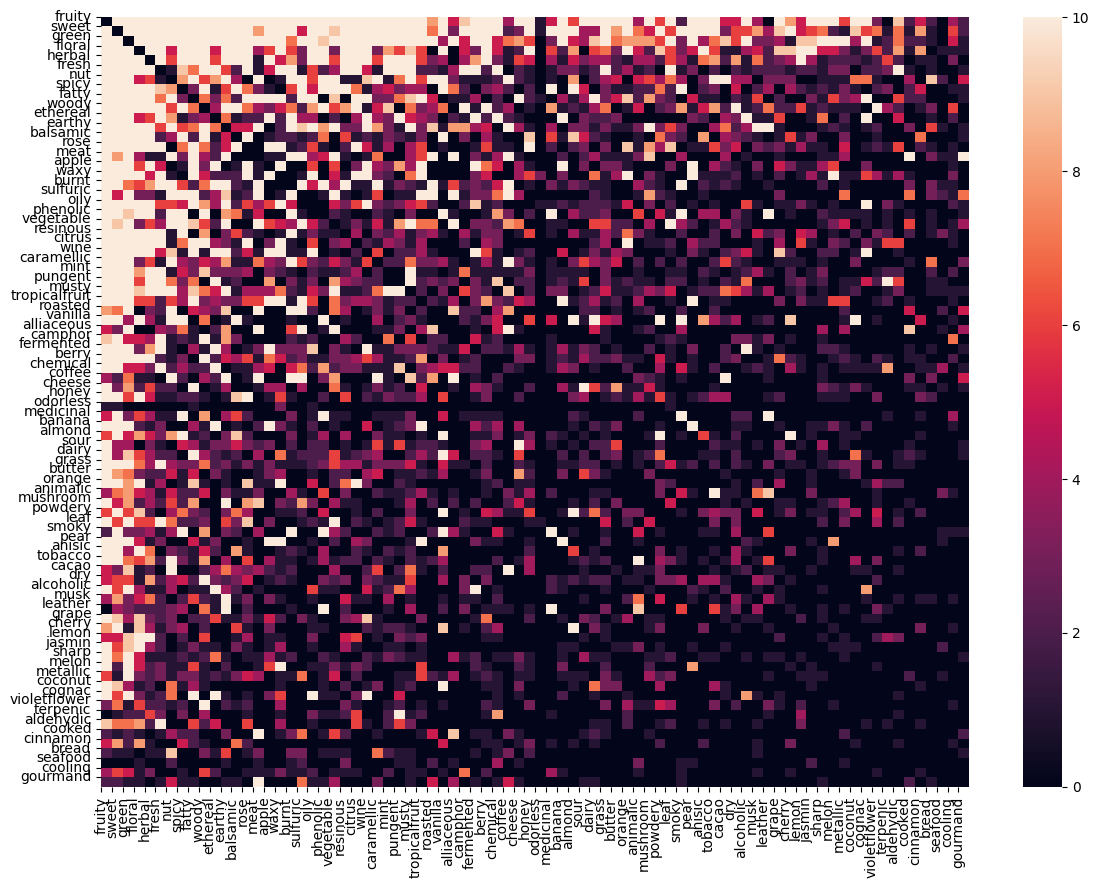

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(odor_matrix[:80,:80], vmax=10)
plt.xticks(range(len(sorted_odor[:80])), sorted_odor[:80],rotation='vertical')
plt.yticks(range(len(sorted_odor[:80])), sorted_odor[:80],rotation='horizontal')
plt.show()


# Now we get the odor labels for our test set via using the Pubchem API for retrieval of info about molecules.
#
# Pubhchem is an open source database for housing information about moleculor compounds

# # Optional(To  extract odor descriptors for the molecules to expand database)

# import re
# def classify(identifier: str) -> str:
#     """Determine the type of chemical indentifier (CAS, smiles, inchi, inchikey)
#
#     Parameters
#     ----------
#     indentifier : str
#         a string of chemical indentifier
#
#     Returns
#     -------
#     str
#         one of (CAS, smiles, inchi, inchikey)
#     """
#
#     # https://www.ebi.ac.uk/miriam/main/collections/MIR:00000237
#     cas_pattern = re.compile(r'^\d{1,7}\-\d{2}\-\d$')
#
#     '''
#     The first is reference from: https://gist.github.com/lsauer/1312860/264ae813c2bd2c27a769d261c8c6b38da34e22fb#file-smiles_inchi_annotated-js
#     However, this can be matched with CAS or InChIKey as well
#     >>> smiles_pattern = re.compile(r'^(?!InChI=)[^J][a-zA-Z0-9@+\-\[\]\(\)\\\/%=#$]{1,}$')
#     This will not match CAS or InChIKey.
#     Even then, the solution below can match a lot more strings:
#         'some non sense'
#         '123456789',
#         1234567,
#         'qwertyui'
#     '''
#     smiles_pattern = re.compile(r'^(?!InChI=)(?!\d{1,7}\-\d{2}\-\d)(?![A-Z]{14}\-[A-Z]{10}(\-[A-Z])?)[^J][a-zA-Z0-9@+\-\[\]\(\)\\\/%=#$]{1,}$')
#
#     # https://www.ebi.ac.uk/miriam/main/collections/MIR:00000383
#     inchi_pattern = re.compile(r'^InChI\=1S?\/[A-Za-z0-9\.]+(\+[0-9]+)?(\/[cnpqbtmsih][A-Za-z0-9\-\+\(\)\,\/\?\;\.]+)*$')
#
#     # https://www.ebi.ac.uk/miriam/main/collections/MIR:00000387
#     inchikey_pattern = re.compile(r'^[A-Z]{14}\-[A-Z]{10}(\-[A-Z])?')
#
#     # IMPORTANT: careful with the order of the dict since one regex might match more than 1 type
#     # See smiles_pattern above
#     lookup = {
#         'cas': lambda x: cas_pattern.search(x),
#         'inchi': lambda x: inchi_pattern.search(x),
#         'inchikey': lambda x: inchikey_pattern.search(x),
#         'smiles': lambda x: smiles_pattern.search(x),
#     }
#
#     for key, value in lookup.items():
#         if value(identifier):
#             return key
#
#

# import re
# import sys
# import traceback
# import xml.etree.ElementTree as ET
# from typing import Optional
#
# import pandas as pd
# import pubchempy as pcp  # https://pubchempy.readthedocs.io/en/latest/guide/gettingstarted.html
# import requests
#
#
# debug = False
#
#
# def odor_lookup_pubchem(identifier, namespace=None, domain='compound') -> Optional[str]:
#     global debug
#
#     if len(sys.argv) == 2 and sys.argv[1] in ['--debug=True', '--debug=true', '--debug', '-d']:
#         debug = True
#
#     # if debug:
#     #     print(f'In DEBUG mode: {debug}')
#
#     # Identify lookup source (Pubchem in this case)
#     lookup_source = 'Pubchem'
#
#     try:
#         headers = {
#             'user-agent': 'Mozilla/5.0 (X11; CentOS; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36'}
#
#         # print('Searching Pubchem...')
#
#         # Using pubchem api for python
#         # Getting CID number, the result of this, by default is exact match. The result is returned as a list.
#         cids = []
#         identifier_type = ''
#
#         if not namespace:
#             identifier_type = classify(identifier)
#             # print(f'identifier_type determined by classify() is: {identifier_type}')
#
#             # If the input is inchi, inchikey or smiles (this could be a false smiles):
#             if identifier_type in ['smiles', 'inchi', 'inchikey']:
#                 lookup = pcp.get_cids(identifier, namespace=identifier_type)
#                 if lookup:
#                     cids.append(lookup[0])
#             else:
#                 lookup = pcp.get_cids(identifier, namespace='name')
#                 if lookup:
#                     cids.append(lookup[0])
#                     # print(f'namespace from pubchem lookup is: {namespace}')
#         elif namespace == 'cas':
#             cids = pcp.get_cids(identifier, namespace='name')
#         else:
#             cids = pcp.get_cids(identifier, namespace=namespace)
#
#         if not cids:
#             lookup = pcp.get_cids(identifier, namespace='name')
#             if lookup:
#                 cids.append(lookup[0])
#
#             # cids = pcp.get_cids(identifier, namespace=namespace)
#             identifier_type = namespace
#
#         # print(cids)
#
#         #  this api return an empty list if it cannot find cas_nr. This is to check if pubchem has this chemical.
#         if len(cids) > 0:
#             # if Pubchem found the result, get the first result of the list
#             cid = cids[0]
#             # print('Compound ID (CID) from PubChem is: {} and type is: {}'.format(cid, type(cid)))
#
#             exact_match = True
#
#             # synonyms = []
#             synonyms = pcp.get_synonyms(cid)[0]['Synonym'] or []
#
#             # Extract CAS number from the list of synonyms
#             returned_cas = ''
#             for synonym in synonyms:
#                 cas_nr = re.search(r'^\d{2,7}-\d{2}-\d$', synonym)
#                 if cas_nr:
#                     cas_nr = cas_nr.group()
#                     returned_cas = cas_nr
#                     break
#
#             # lookup_result = []
#             lookup_result = pcp.get_properties(['inchi', 'inchikey',
#                                         'canonical_smiles', 'isomeric_smiles',
#                                         'iupac_name'],
#                                 cid)
#
#             if identifier_type == 'cas':
#                 # To double check if the CAS number is correct:
#                 # using pubchem api, get a list of synonym. The result is a list of dict.
#                 # choose the first result and check all values for 'Synonym' key:
#                 exact_match = identifier in synonyms
#
#             elif identifier_type in ['inchi', 'inchikey']:
#
#                 if identifier_type == 'inchi':
#                     # print(lookup_result[0].get('InChI', False))
#                     # print(f'input:\n{identifier}')
#                     exact_match = (identifier == lookup_result[0].get('InChI', False))
#
#                 elif identifier_type == 'inchikey':
#                     exact_match = (identifier == lookup_result[0].get('InChIKey', False))
#
#             if not exact_match:
#                 if debug:
#                     print(f'Exact match between input and Pubchem return value? {identifier in synonyms}')
#                 raise ValueError('This is not an exact match on Pubchem!')
#
#             '''
#             get url from Pubchem to get pka lookup result
#             'XML' can be replaced with 'JSON' but it is harder to parse later on
#             for more info about Pubchem output types: https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest$_Toc494865558
#             '''
#             pka_lookup_result_xml = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{}/XML?heading=Odor'.format(cid)
#
#             # Get the html request info using CID number from pubchem
#             r = requests.get(pka_lookup_result_xml, headers=headers, timeout=15)
#             # Check to see if give OK status (200) and not redirect
#             if r.status_code == 200 and len(r.history) == 0:
#                 # print(r.text)
#                 # Use python XML to parse the return result
#                 tree = ET.fromstring(r.text)
#
#                 # Get the XML tree of <Information> only
#                 info_node = tree.find('.//*{http://pubchem.ncbi.nlm.nih.gov/pug_view}Information')
#
#                 # Get the pKa reference:
#                 original_source = info_node.find('{http://pubchem.ncbi.nlm.nih.gov/pug_view}Reference').text
#                 # Get the pKa result:
#                 odor_result = info_node.find('.//*{http://pubchem.ncbi.nlm.nih.gov/pug_view}String').text
#                 odor_result = re.sub(r'^pKa = ', '', odor_result)    # remove 'pka = ' part out of the string answer
#                 # print(pka_result)
#                 # print(original_source)
#                 # print(lookup_result)
#
#                 return [a.lower() for a in re.split(',| |-',odor_result)]
#
#             else:
#                 raise RuntimeError('pKa not found in Pubchem.')
#
#         else:
#             raise RuntimeError('Compound not found in Pubchem.')
#
#     except Exception as error:
#         if debug:
#             traceback_str = ''.join(traceback.format_exception(etype=type(error), value=error, tb=error.__traceback__))
#             print(traceback_str)
#
#         return "NA"
#

# print(odor_lookup_pubchem("CC(C)CO"))

# tes_dic=dict()
# for i in range(0,1079,100):
#   for x in test["SMILES"][i:i+100]:
#     y=odor_lookup_pubchem(x)
#     if(y!='NA'):
#       l=[z for z in y if z in vocab]
#       if(len(l)!=0):
#         tes_dic[x]=l

# tes_dic['CC(=CCCC(C)CC=O)C']

# # **Feature Generation/Extraction**

# ## Using hand-crafted features(Mordred)

#  A molecular descriptor is defined as the â€œfinal result of a logical and mathematical procedure, which transforms chemical information encoded within a symbolic representation of a molecule into a useful number or the result of some standardized experiment.
#
# Mordred consists of two main classes: â€œDescriptorâ€ and â€œCalculatorâ€. The algorithms for computing molecular descriptors are implemented in the subclass of the Descriptor class.
#
# The Mordred package is licensed openly and allows for
# computation of features like- No of carbon atoms,No of hydrogen atoms,Ring count etc all of which transcribe the information about the structure of our molecule.


In [14]:
#!pip install openpyxl

In [15]:
#This provides a complete list of all the descriptors that are computed by our Calculator instance


In [16]:
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.0 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=91a0ce59117569d327f5442a223014e8c6af8c49876f4bdaa6e62d453b3c28f7
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [17]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 49.7 MB/s eta 0:00:00


In [18]:
import mordred

from mordred import Calculator,descriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors, Draw

In [19]:
# def mord(data):
#   #Under the Rdkit package all the operations
#   #are done on the molecule object which can be obtained by using the Molfromsmiles method
#   mol_data_set = [Chem.MolFromSmiles(x) for x in data["SMILES"]]
#   l=[]
#   for x in mol_data_set:
#     calc=Calculator(descriptors)
#     new_feat=calc(x)
#     new_dict=new_feat.drop_missing().asdict()
#     l.append(new_dict)
#   return pd.DataFrame(l)

In [20]:
# #This cell takes almost 45 minutes to run, so we save the dataframe after running it once for easier access
# #in later ru
# x_mord=mord(df)

In [21]:
# import pandas as pd
# x_mord.to_csv("mor.csv",index=False)


# # ## Using Molecular Fingerprints

# # The molecular fingerprint is just another way of numerically representing a molecule. The bit-like patterns generated by the fingerprint indicate an absence or a presence of certain substructures/fragments within a molecule.
# # A molecular fingerprint characterizes the pattern, but the meaning of any particular bit is not well defined.

# # Molecular fingerprints represent a set of features derived from the structure of a molecule. The particular features calculated from the structure can be quite arbitrary and depend on the topology of the chemical graph or even a 3D conformation. Different fingerprint schemes emphasize different molecular attributes according to the design philosophy of the fingerprint system. The fundamental idea is to encapsulate certain properties directly or indirectly in the fingerprint and then use the fingerprint as a surrogate for the chemical structure.
# #

# # ### **Types of Fingerprints**

# # Given the diversity of molecules, multiples ways of fingerprinting have been developed.Here we discuss a few of them.
# #
# #

# # The fingerprinting algorithm examines the molecule and generates the following:
# #
# # 1) A pattern for each atom
# #
# # 2) A pattern representing each atom and its nearest neighbors (plus the bonds that join them)
# #
# # 3) A pattern representing each group of atoms and bonds connected by paths up to 2 bonds long
# #
# # 4)... atoms and bonds connected by paths up to 3 bonds long
# #
# # 5)... continuing, with paths up to 4, 5, 6, and 7 bonds long.
# #
# # For example, the molecule OC=CN would generate the following patterns:
# #
# # | Path length   |  Fragments|
# # |----------|:-------------:|
# # |0-bond paths:	|  C ,	  O ,  N|
# # |1-bond paths:	|  OC ,	  C=C ,	  CN|
# # |2-bond paths:	|  OC=C ,	  C=CN	|
# # |3-bond paths:	|  OC=CN|


In [22]:


#Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/Screenshot (89).png")

# Each fragment serves as a seed to a pseudo-random number generator (it is "hashed"), the output of which is a set of bits (typically 4 or 5 bits per pattern); the set of bits thus produced is added (with a logical OR) to the fingerprint.

# ##### **Path based Fingerprints**

# In this type of fingerprints, fragments of the molecule are generated by following a (usually linear) path up to a certain number of bonds within the molecule.


In [23]:
#Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/In-path-based-fingerprints-linear-or-in-some-cases-branched-paths-up-to-a-certain.png",height=400,width=600)


#  Starting with the Amino group, all of the possible fragments are shown.

In [24]:
# def path_based_fing(df):
#     # Convert SMILES strings into molecules
#     mols = [Chem.rdmolfiles.MolFromSmiles(SMILES_string) for SMILES_string in df["SMILES"]]
#     fps = [Chem.RDKFingerprint(m,fpSize=1024) for m in mols ]

#     # Convert training fingerprints into binary
#     np_fps = []


#     for fp in fps:
#       arr = np.zeros((1,), dtype= int)
#       DataStructs.ConvertToNumpyArray(fp, arr)
#       np_fps.append(arr)
#     return pd.DataFrame(np_fps)


# #### Circular Fingerprints

In [25]:
# Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/count_based.jpg",height=400,width=600)

# # Instead of linearly searching along each bond to generate fragments,Circular fingerprints generate fragments radially while varying the radius in each iteration.


In [26]:

# def morgan_fing(df):
#     # Convert SMILES strings into molecules
#     mols = [Chem.rdmolfiles.MolFromSmiles(SMILES_string) for SMILES_string in df["SMILES"]]
#     fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m, radius=2, bitInfo= {}, nBits=1024, useChirality=True) for m in mols]

#     np_fps = []
#     for fp in fps:
#       arr = np.zeros((1,), dtype= int)
#       DataStructs.ConvertToNumpyArray(fp, arr)
#       np_fps.append(arr)
#     return pd.DataFrame(np_fps)


# # Splitting The Data

In [27]:

table.tail(10).sort_values(by="No of associated samples")


# We can see that fennal has the least number of instances in our dataset.From exploratory data Analysis we have also concluded that the dataset is heavily imbalanced.
#
# Therefore to ensure that the training and test dataset have general representation of the data, we'll use stratified sampling instead of normal sampling while splitting.
# Because if we do a random split it might be that our test/training set might not have any instances of fennal odor descriptor at all. This will lead to huge bias in our model and error in evaluation metrics.

# Although there are fairly developed tools in sckikit learn to handle straitified splitting, most of them are not compatible with multi label data.
#
# We use the scikit-multilearn library for the same.The algorithm for stratifying multilabel data is in itself complex and modeled after a greedy approach.
# [Here is a link to the research paper discussing the same ](https://link.springer.com/content/pdf/10.1007%2F978-3-642-23808-6_10.pdf)


,Odor,No of associated samples,Percentage_of_samples
107,fennel,1,0.033135
108,cedar,1,0.033135
105,ambergris,3,0.099404
106,ambrette,3,0.099404
103,watery,5,0.165673
104,lactonic,5,0.165673
101,ambery,6,0.198807
102,blueberry,6,0.198807
100,overripe,7,0.231942
99,clove,9,0.298211


In [28]:


#Before we make the split, we need to binarize our target labels because the implementation of
#the stratifiedsplit require the targed labels to be in a binarized format

from sklearn.preprocessing import MultiLabelBinarizer
enc=MultiLabelBinarizer()
y=enc.fit_transform(df["Odor"])
# y=enc.fit_transform(df["Odor"])


# We use the multilabelbinarizer to provide a unique label encoding to each one of the 109 odor classes and then transform our target label as a sparse binary matrix where 1 denotes the label is present and 0 denotes the label is absent


In [29]:

Y=pd.DataFrame(y,columns=enc.classes_)


In [30]:

df.head()


,smile,Odor,0,1,2,3,4,5,6,7,...,GATS4i,GATS5i,GATS6i,GATS7i,BCUTc-1h,BCUTc-1l,BCUTdv-1h,BCUTdv-1l,BCUTd-1h,BCUTd-1l
0,c1ccc(cc1)C(=O)O,[balsamic],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
1,OC(=O)c1ccccc1,[odorless],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
2,O=C(O)c1ccccc1,[balsamic],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
3,CC(C)CCOC(OCCC(C)C)c1ccccc1,"[fruity, almond, herbal, cherry, sweet]",2.830000e-08,1.880000e-07,9.850000e-07,4.070000e-06,1.340000e-05,3.520000e-05,0.000076,0.000135,...,-0.018078,0.055673,-0.031324,-0.000355,0.032360,-0.008213,-0.038778,0.037154,0.038964,-0.005344
4,CCCCCCOC(=O)CCC(C)=O,"[fruity, caramellic, wine]",4.770000e-05,1.295770e-04,2.835450e-04,5.107810e-04,7.830350e-04,1.072647e-03,0.001391,0.001776,...,-0.011135,-0.008685,-0.005962,-0.013124,-0.026249,0.065233,-0.012205,0.001142,0.008183,0.008014


In [31]:

Y.head()

,alcoholic,aldehydic,alliaceous,almond,ambergris,ambery,ambrette,ammoniac,animalic,anisic,...,tobacco,tropicalfruit,vanilla,vegetable,violetflower,watery,waxy,whiteflower,wine,woody
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
Y.to_csv("labels.csv",index=False)

In [33]:
classes=enc.classes_
print(classes)
len(classes)

['alcoholic' 'aldehydic' 'alliaceous' 'almond' 'ambergris' 'ambery'
 'ambrette' 'ammoniac' 'animalic' 'anisic' 'apple' 'balsamic' 'banana'
 'berry' 'blackcurrant' 'blueberry' 'body' 'bread' 'burnt' 'butter'
 'cacao' 'camphor' 'caramellic' 'cedar' 'cheese' 'chemical' 'cherry'
 'cinnamon' 'citrus' 'clean' 'clove' 'coconut' 'coffee' 'cognac'
 'coniferous' 'cooked' 'cooling' 'cucumber' 'dairy' 'dry' 'earthy' 'ester'
 'ethereal' 'fatty' 'fennel' 'fermented' 'floral' 'fresh' 'fruity'
 'geranium' 'gourmand' 'grape' 'grapefruit' 'grass' 'green' 'herbal'
 'honey' 'hyacinth' 'jasmin' 'lactonic' 'leaf' 'leather' 'lemon' 'lily'
 'liquor' 'meat' 'medicinal' 'melon' 'metallic' 'mint' 'mushroom' 'musk'
 'musty' 'nut' 'odorless' 'oily' 'orange' 'overripe' 'pear' 'pepper'
 'phenolic' 'plastic' 'plum' 'powdery' 'pungent' 'rancid' 'resinous'
 'ripe' 'roasted' 'rose' 'seafood' 'sharp' 'smoky' 'sour' 'spicy'
 'sulfuric' 'sweet' 'syrup' 'terpenic' 'tobacco' 'tropicalfruit' 'vanilla'
 'vegetable' 'violetflow

109

In [34]:
!pip install iterative-stratification

In [35]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.0 MB/s eta 0:00:00


In [36]:
import skmultilearn
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.model_selection import train_test_split
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
#We do a hold out testing for our model validation, under stratified sampling.


In [37]:


#The main function we'll call for splitting the data in accordance with
#the algorithm in the paper cited above
def iterative_split(x,y,test_size):
  x=np.array(x)
  y=np.array(y)
  np.random.seed(42)
  return iterative_train_test_split(x,y,test_size=test_size)

In [38]:
df.head()

,smile,Odor,0,1,2,3,4,5,6,7,...,GATS4i,GATS5i,GATS6i,GATS7i,BCUTc-1h,BCUTc-1l,BCUTdv-1h,BCUTdv-1l,BCUTd-1h,BCUTd-1l
0,c1ccc(cc1)C(=O)O,[balsamic],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
1,OC(=O)c1ccccc1,[odorless],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
2,O=C(O)c1ccccc1,[balsamic],8.070000e-13,1.920000e-11,3.570000e-10,5.200000e-09,5.910000e-08,5.250000e-07,0.000004,0.000020,...,0.008556,-0.008723,-0.052065,0.003694,-0.002353,0.034307,0.024873,-0.005083,0.012535,-0.009948
3,CC(C)CCOC(OCCC(C)C)c1ccccc1,"[fruity, almond, herbal, cherry, sweet]",2.830000e-08,1.880000e-07,9.850000e-07,4.070000e-06,1.340000e-05,3.520000e-05,0.000076,0.000135,...,-0.018078,0.055673,-0.031324,-0.000355,0.032360,-0.008213,-0.038778,0.037154,0.038964,-0.005344
4,CCCCCCOC(=O)CCC(C)=O,"[fruity, caramellic, wine]",4.770000e-05,1.295770e-04,2.835450e-04,5.107810e-04,7.830350e-04,1.072647e-03,0.001391,0.001776,...,-0.011135,-0.008685,-0.005962,-0.013124,-0.026249,0.065233,-0.012205,0.001142,0.008183,0.008014


In [39]:
# start_column = "0"
# end_column = "799"
# # Get the column index for start_column and end_column
# start_idx = df.columns.get_loc(start_column)
# end_idx = df.columns.get_loc(end_column)
# # Slice the DataFrame to include columns from start_idx to end_idx
# sliced_df = df.iloc[:, start_idx:end_idx + 1]
# new_df = pd.DataFrame(sliced_df)
new_df=df.drop(['smile','Odor'],axis=1)

In [40]:
new_df.shape

(3018, 2200)

In [41]:

#Let's visualize our split and compare it with a random split.
#We test our split function using morgan featurization.
x_train,y_train,x_test,y_test=iterative_split(new_df,Y,test_size=0.2)

In [42]:


#This is a random split
X_train,X_test,Y_train,Y_test=train_test_split(new_df,Y,random_state=42,test_size=0.2)


In [43]:
print("y_train{}  ".format(y_train.shape) +"\n"+"y_test{}   ".format(y_test.shape)+"\n"+"x_train{}  ".format(x_train.shape)+"\n"+"x_test{}  ".format(x_test.shape))


y_train(2377, 109)  
y_test(641, 109)   
x_train(2377, 2200)  
x_test(641, 2200)  


In [44]:
def label_distribution(y_train,y_test):
  voc= defaultdict(int)
  for arr in y_train:
    for i in range(109):
      if(arr[i]==1):
        voc[i]+=1
  plt.figure(figsize=(30,10))
  plt.bar(voc.keys(),[(i/len(y_train))*100 for i in voc.values()])
  voc= defaultdict(int)
  for arr in y_test:
    for i in range(109):#160
      if(arr[i]==1):
        voc[i]+=1
  plt.xlabel("Odors")
  plt.ylabel("Percentage of samples associated")
  plt.bar(voc.keys(),[(i/len(y_test))*100 for i in voc.values()])
  plt.legend(["train-set","test-set"])
  plt.show()


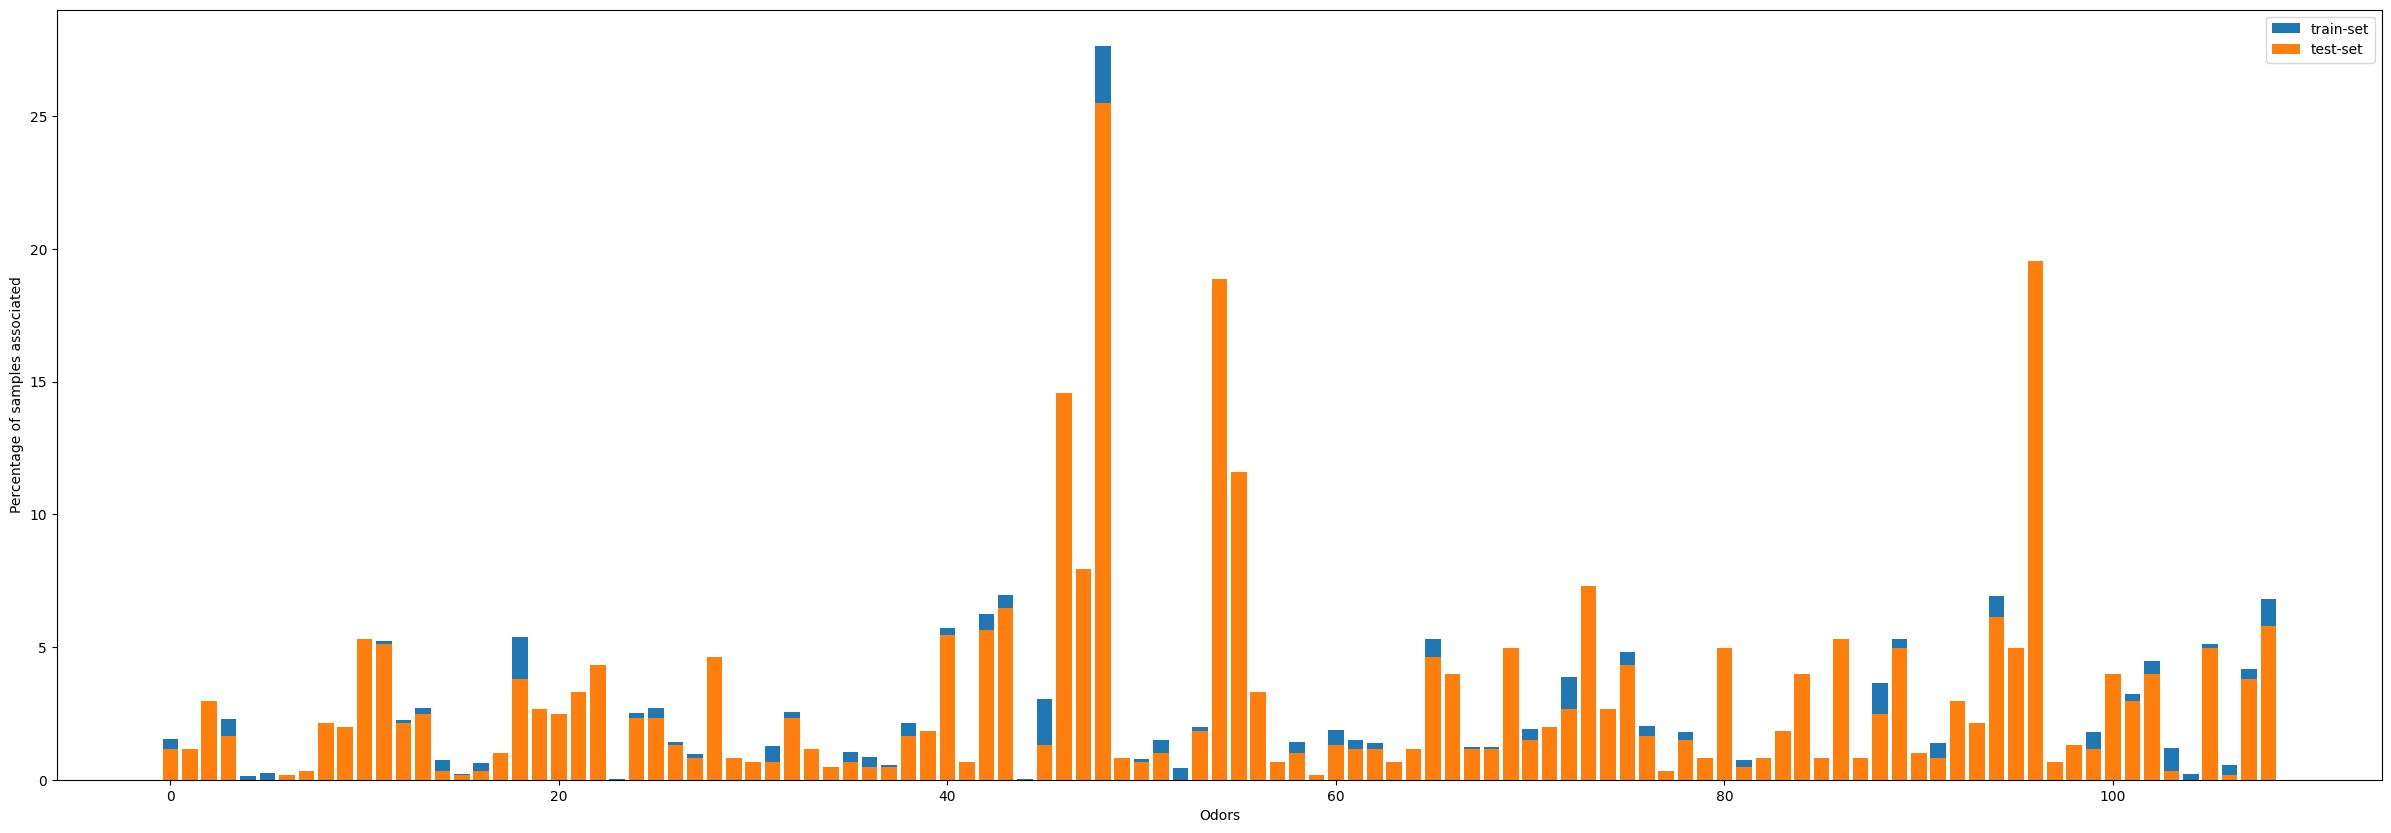

In [45]:
label_distribution(np.array(Y_train),np.array(Y_test))#label distribution while doing a random split

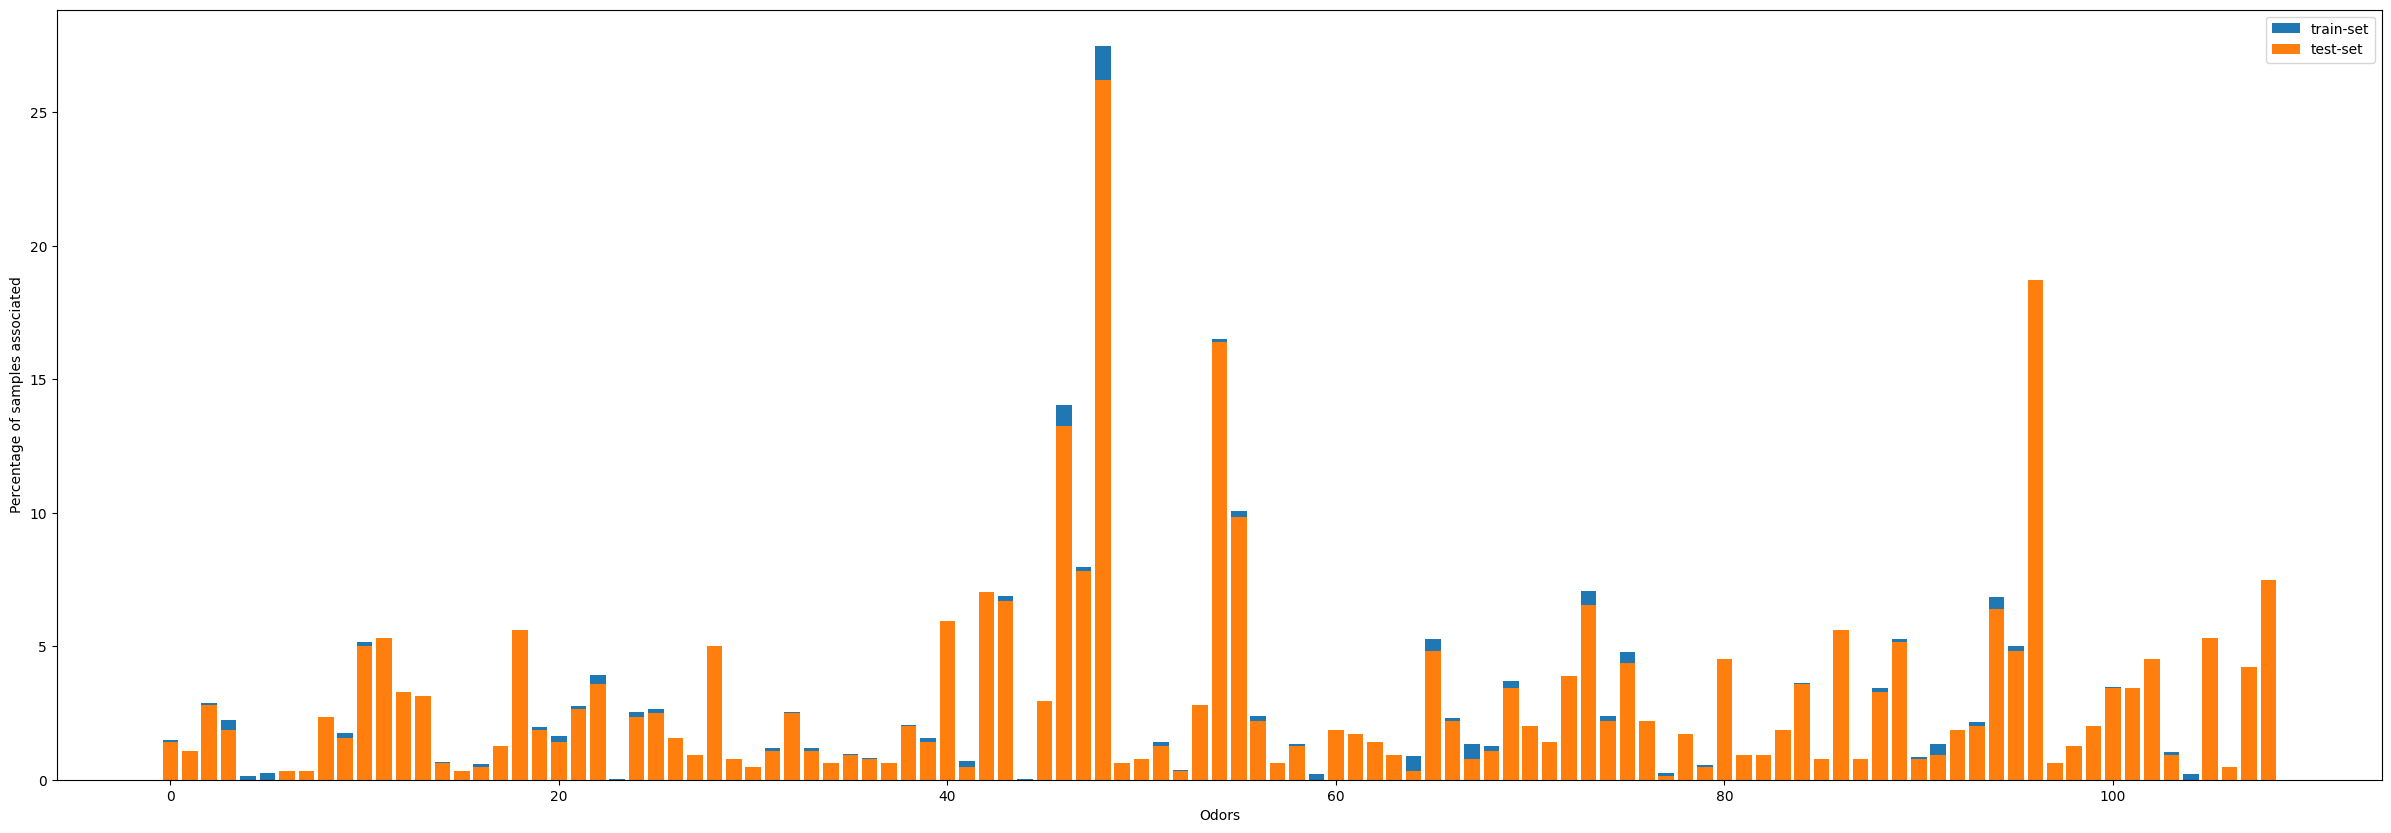

In [46]:
label_distribution(y_train,y_test)# label distribution while doing a stratified split

In [47]:
!pip install python-louvain


In [48]:
!pip install networkx
!pip install python-louvain
!pip install scikit-multilearn

In [49]:
#!pip install karateclub


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


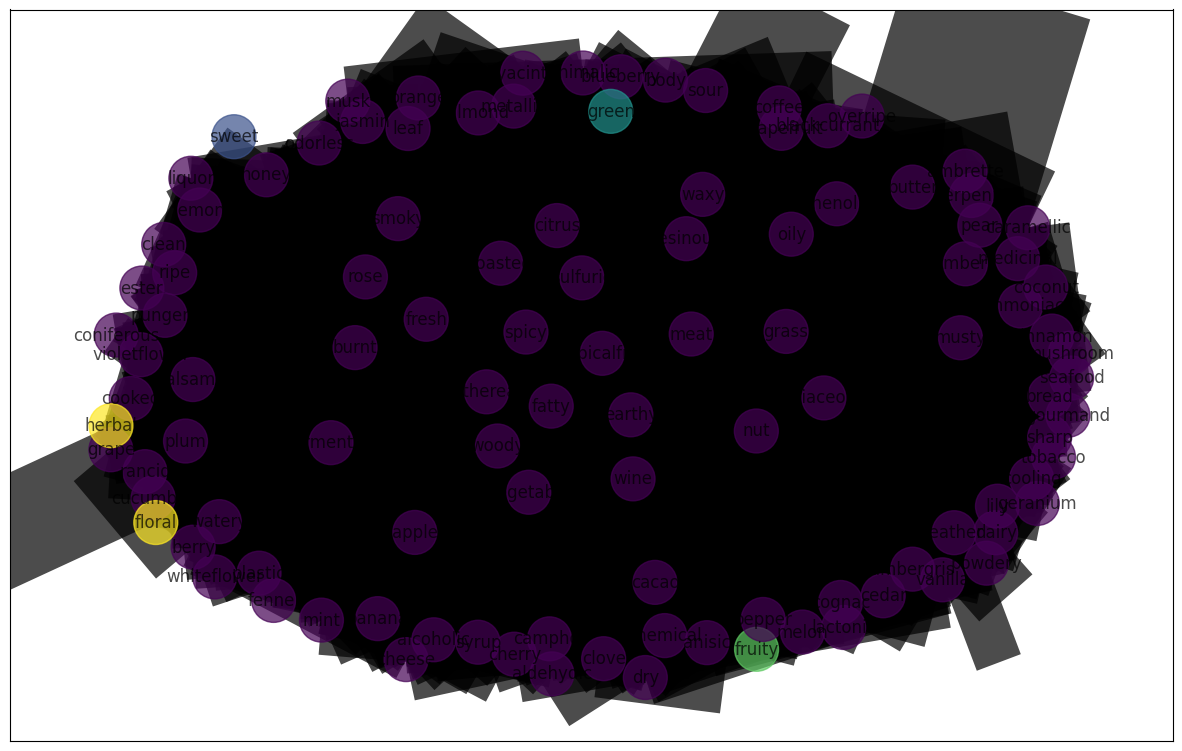

In [50]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have defined x_train, y_train, and classes before this point

# Step 1: Create the label co-occurrence matrix
label_cooc_matrix = np.dot(y_train.T, y_train)

# Step 2: Perform KMeans clustering on the label co-occurrence matrix
num_clusters = 5  # You can adjust the number of clusters as desired
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(label_cooc_matrix)

# Step 3: Create the networkx graph
G = nx.Graph()
for i, label in enumerate(classes):
    G.add_node(i, label=label)

for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    for u in cluster_indices:
        for v in cluster_indices:
            if u != v:
                weight = label_cooc_matrix[u, v]
                G.add_edge(u, v, weight=weight)

# Step 4: Visualize the graph with clusters
names_dict = dict(enumerate(x for x in classes))
pos = nx.spring_layout(G, k=4)

plt.figure(figsize=(15, 9.5))
nx.draw_networkx(
    G,
    pos=pos,
    labels=names_dict,
    with_labels=True,
    width=[10 * G[u][v]['weight'] for u, v in G.edges()],
    node_color=[cluster_labels[i] for i in range(len(classes))],
    cmap=plt.cm.viridis,
    node_size=1000,
    font_size=12,
    font_color='black',
    alpha=0.7,
    ax=plt.gca()  # Use the current Axes instance
)
plt.show()


In [51]:

from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

label_names=[i for i in range(109)]
edge_map = graph_builder.transform(np.array(y_train))
print("{} labels, {} edges".format(len(label_names), len(edge_map)))


109 labels, 2247 edges


In [52]:

# #import numpy as np
# # import networkx as nx
# # from karateclub import Node2Vec
# # from sklearn.cluster import KMeans

# # # Assuming you already have x_train and y_train defined
# # # Assuming you have a binary label matrix
# # edge_list = []
# # for i in range(y_train.shape[1]):
# #     for j in range(i + 1, y_train.shape[1]):
# #         if np.any(y_train[:, i] & y_train[:, j]):
# #             edge_list.append((i, j))

# # # Create a networkx graph from the edge_list
# # graph = nx.Graph()
# # graph.add_edges_from(edge_list)

# # # Use Node2Vec for embedding
# # model = Node2Vec()
# # model.fit(graph)

# # # Get the embeddings for nodes
# # node_embeddings = model.get_embedding()

# # # Use KMeans for clustering (you can try other clustering algorithms too)
# # num_clusters = 2  # Replace with the desired number of clusters
# # kmeans = KMeans(n_clusters=num_clusters)
# # clusters = kmeans.fit_predict(node_embeddings)

# # # Helper function for visualization
# # def to_membership_vector(clusters):
# #     membership_vector = {}
# #     for i, cluster_id in enumerate(clusters):
# #         if cluster_id not in membership_vector:
# #             membership_vector[cluster_id] = []
# #         membership_vector[cluster_id].append(i)
# #     return membership_vector

# # # Convert the clusters to a membership vector
# # membership_vector = to_membership_vector(clusters)
# # print(membership_vector)


In [53]:

# # from skmultilearn.cluster import NetworkXLabelGraphClusterer
# # # we define a helper function for visualization purposes
# # def to_membership_vector(partition):
# #     return {
# #         member :  partition_id
# #         for partition_id, members in enumerate(partition)
# #         for member in members
# #     }
# # clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [54]:

##partition = clusterer.fit_predict(x_train,y_train)


In [55]:

# # membership_vector = to_membership_vector(partition)
# # print('There are', len(partition),'clusters')

In [56]:

# # import networkx as nx
# # names_dict = dict(enumerate(x for x in classes))
# # import matplotlib.pyplot as plt
# # get_ipython().run_line_magic('matplotlib', 'inline')
# # plt.figure(1,figsize=(15,9.5))
# # nx.draw(
# #     clusterer.graph_,
# #     pos=nx.spring_layout(clusterer.graph_,k=4),
# #     labels=names_dict,
# #     with_labels = True,
# #     width = [10*x/y_train.shape[0] for x in clusterer.weights_['weight']],
# #     node_color = [membership_vector[i] for i in range(y_train.shape[1])],
# #     cmap=plt.cm.viridis,
# #     node_size=1000,
# #     font_size=12,
# #     font_color='black',
# #     alpha=0.7
# # )
# # plt.show()


# # # # Preprocessing the data

# # # Now we look to preprocess our feature set. As explained above we've used three different featurization strategies.We will now take a look at the feature set generated by each.


In [57]:


# x_morg=morgan_fing(df)
# x_morg.head()

In [58]:


# x_path=path_based_fing(df)
# x_path.head()

# # Since fingerprint based featurization just gives us an array of 0's and 1's there will be no missing values and we don't need to apply standardisation either in the name of pre-processing.Let's now peak at our modred featurization


In [59]:

# x_mord=pd.read_csv("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Dataset/mor.csv")
# x_mord.head()

In [60]:

# x_mord=x_mord.astype(float)

In [61]:

# x_mord.shape


# # x_mord.dropna(axis=1,inplace=True)
# # x_mord.shape

# # There seems to be a lot of missing values in mordred featurization,let's check which features have the highest missing values


In [62]:


l=dict(new_df.isna().sum(axis=0))#Feature wise
m=dict(new_df.isna().sum(axis=1))#sample wise

In [63]:


x=sorted(l.items(),key=lambda x:x[1],reverse=True)
y=sorted(m.items(),key=lambda x:x[1],reverse=True)
print(x)
print(y)


# Since we want to try and retain as many features as possible, we will drop those features which have a lot of values missing(eg-"MINssB" which has only 1 non missing value) and impute the rest using KNN strategy.
#
# We also opt not to drop missing values row wise because each molecule contains important information in the context of the Odor prediction task

# Let's look at the precentage of missing values for each column.


[('0', 0), ('1', 0), ('2', 0), ('3', 0), ('4', 0), ('5', 0), ('6', 0), ('7', 0), ('8', 0), ('9', 0), ('10', 0), ('11', 0), ('12', 0), ('13', 0), ('14', 0), ('15', 0), ('16', 0), ('17', 0), ('18', 0), ('19', 0), ('20', 0), ('21', 0), ('22', 0), ('23', 0), ('24', 0), ('25', 0), ('26', 0), ('27', 0), ('28', 0), ('29', 0), ('30', 0), ('31', 0), ('32', 0), ('33', 0), ('34', 0), ('35', 0), ('36', 0), ('37', 0), ('38', 0), ('39', 0), ('40', 0), ('41', 0), ('42', 0), ('43', 0), ('44', 0), ('45', 0), ('46', 0), ('47', 0), ('48', 0), ('49', 0), ('50', 0), ('51', 0), ('52', 0), ('53', 0), ('54', 0), ('55', 0), ('56', 0), ('57', 0), ('58', 0), ('59', 0), ('60', 0), ('61', 0), ('62', 0), ('63', 0), ('64', 0), ('65', 0), ('66', 0), ('67', 0), ('68', 0), ('69', 0), ('70', 0), ('71', 0), ('72', 0), ('73', 0), ('74', 0), ('75', 0), ('76', 0), ('77', 0), ('78', 0), ('79', 0), ('80', 0), ('81', 0), ('82', 0), ('83', 0), ('84', 0), ('85', 0), ('86', 0), ('87', 0), ('88', 0), ('89', 0), ('90', 0), ('91', 0

In [64]:
for key,value in l.items():
  l[key]=(value/(new_df.shape[0]))*100

In [65]:
x=sorted(l.items(),key=lambda x:x[1],reverse=True)

In [66]:
print(x)

[('0', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0), ('10', 0.0), ('11', 0.0), ('12', 0.0), ('13', 0.0), ('14', 0.0), ('15', 0.0), ('16', 0.0), ('17', 0.0), ('18', 0.0), ('19', 0.0), ('20', 0.0), ('21', 0.0), ('22', 0.0), ('23', 0.0), ('24', 0.0), ('25', 0.0), ('26', 0.0), ('27', 0.0), ('28', 0.0), ('29', 0.0), ('30', 0.0), ('31', 0.0), ('32', 0.0), ('33', 0.0), ('34', 0.0), ('35', 0.0), ('36', 0.0), ('37', 0.0), ('38', 0.0), ('39', 0.0), ('40', 0.0), ('41', 0.0), ('42', 0.0), ('43', 0.0), ('44', 0.0), ('45', 0.0), ('46', 0.0), ('47', 0.0), ('48', 0.0), ('49', 0.0), ('50', 0.0), ('51', 0.0), ('52', 0.0), ('53', 0.0), ('54', 0.0), ('55', 0.0), ('56', 0.0), ('57', 0.0), ('58', 0.0), ('59', 0.0), ('60', 0.0), ('61', 0.0), ('62', 0.0), ('63', 0.0), ('64', 0.0), ('65', 0.0), ('66', 0.0), ('67', 0.0), ('68', 0.0), ('69', 0.0), ('70', 0.0), ('71', 0.0), ('72', 0.0), ('73', 0.0), ('74', 0.0), ('75', 0.0), ('76', 0.0), ('77', 0

In [67]:
drop_columns=[i[0] for i in x if i[1]>40]#We'll drop columns which have more than 40 percent missing values


In [68]:

print(drop_columns,)

[]


In [69]:
new_df.drop(labels=drop_columns,axis=1,inplace=True)

In [70]:
list_of_columns=new_df.columns

In [71]:

new_df.info()


# The no of dimenstions for our feature set is very large(1436), so it might be prudent to apply a dimensionality reduction technique like PCA so that it's easier to train our model.

# Now let's build a pre-processing pipline for our mordred featurisation that can apply imputation,standardisation and PCA transformation on our data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Columns: 2200 entries, 0 to BCUTd-1l
dtypes: float64(2200)
memory usage: 50.7 MB


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer # for calculating the misiing values by nearest neighbors method
from sklearn.decomposition import PCA # (Principal Component Analysis) is a technique for dimensionality reduction and feature extraction

def pre_process(x_train,x_test):
  imp=KNNImputer(missing_values=np.nan)
  x_train=imp.fit_transform(x_train)
  x_test=imp.transform(x_test)

  '''scale=StandardScaler()
  x_train=scale.fit_transform(x_train)
  x_test=scale.transform(x_test)

  pca=PCA(n_components=0.9999)
  x_train=pca.fit_transform(x_train)
  x_test=pca.transform(x_test)
  print("No of components", pca.n_components_)'''
  return x_train,x_test


# # Training and evaluating our model


In [73]:

#We choose Random forest as our model.The choice for model is based on similar challanges in cheminformatics
#where the convention is to use Random forests for predicting molecular property.They are also very powerful
#in capturing non-linear relationships and robust to outliers.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate,GridSearchCV
import statistics
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score,multilabel_confusion_matrix
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
#Utility function to get model performance
def eval_train(model,x,y):

  #splitting the data
  x_train,y_train,x_test,y_test=iterative_split(x,y,test_size=0.2)

  x_train,x_test=pre_process(x_train,x_test)

  # Define the grid of hyperparameters to search
  # param_grid = {
  #     'n_estimators': [10,20],
  #     'max_depth': [None, 10, 20],
  #     'min_samples_split': [2, 5],
  #     'min_samples_leaf': [1, 2],
  #     'max_features': ['auto', 'sqrt', 'log2']
  #     }
  scoring = {
    'f1_micro': make_scorer(f1_score, average='micro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'recall_micro': make_scorer(recall_score, average='micro')
     }

  # # Create a GridSearchCV object
  # grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=MultilabelStratifiedKFold(n_splits=5), scoring="f1_micro", n_jobs=-1)

  # # Perform the grid search
  # grid_search.fit(x_train,y_train)

  # # Get the best hyperparameters
  # best_params = grid_search.best_params_
  # print("param", best_params)

  # model = RandomForestClassifier(**best_params, random_state=42,class_weight="balanced",n_jobs=-1)


  #Fitting our model
  model.fit(x_train,y_train)

  #Getting predictions on training set
  #y_train_prediction=cross_val_predict(model,x_train,y_train,cv=MultilabelStratifiedKFold(n_splits=3))

  #Building a confusion matrix
  #mcf_matrix=multilabel_confusion_matrix(y_train,y_train_prediction)
  #print(mcf_matrix)
  #Evaluating model performance on training data


  train_score=cross_validate(model,x_train,y_train,scoring=scoring ,cv=MultilabelStratifiedKFold(n_splits=5))
  print(statistics.mean(train_score["test_f1_micro"]))
  print(statistics.mean(train_score["test_precision_micro"]))
  print(statistics.mean(train_score["test_recall_micro"]))

  #Evaluating on test data
  y_pred=model.predict(x_test)
  print("f1_score {}".format(f1_score(y_test,y_pred,average="micro")))
  print("precision_score {}".format(precision_score(y_test,y_pred,average="micro")))
  print("recall_score {}".format(recall_score(y_test,y_pred,average="micro")))

  return model


# ## Evaluation Metrics being used

#
# ### Label based
#
# * To measure a multi-class/label classifier we have to average
# out the classes somehow. There are two different methods of doing this called micro-averaging and macro-averaging.
#
# * In micro-averaging method, you sum up the individual true positives, false positives, and false negatives of the system for different label sets and then average them. And the micro-averaged F1-Score will be simply the harmonic mean of micro_precision and micro_recall


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate,GridSearchCV
import statistics
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score,multilabel_confusion_matrix
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
#Utility function to get model performance
def eval_train1(model,x,y):

  #splitting the data
  x_train,y_train,x_test,y_test=iterative_split(x,y,test_size=0.2)

  x_train,x_test=pre_process(x_train,x_test)

  # Define the grid of hyperparameters to search
  param_grid = {
      'classifier__n_estimators': [10,50],
      'classifier__max_depth': [None, 10],
      'classifier__min_samples_split': [2, 5],
      'classifier__min_samples_leaf': [1, 2],
      'classifier__max_features': ['auto', 'log2']
      }
  scoring = {
    'f1_micro': make_scorer(f1_score, average='micro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'recall_micro': make_scorer(recall_score, average='micro')
     }

  # Create a GridSearchCV object
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=MultilabelStratifiedKFold(n_splits=5), scoring="f1_micro", n_jobs=-1)

  # Perform the grid search
  grid_search.fit(x_train,y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  print("param", best_params)

  # model = RandomForestClassifier(**best_params, random_state=42,class_weight="balanced",n_jobs=-1)


  # #Fitting our model
  # model.fit(x_train,y_train)

  # #Getting predictions on training set
  # #y_train_prediction=cross_val_predict(model,x_train,y_train,cv=MultilabelStratifiedKFold(n_splits=3))

  # #Building a confusion matrix
  # #mcf_matrix=multilabel_confusion_matrix(y_train,y_train_prediction)
  # #print(mcf_matrix)
  # #Evaluating model performance on training data


  # train_score=cross_validate(model,x_train,y_train,scoring=scoring ,cv=MultilabelStratifiedKFold(n_splits=5))
  # print(statistics.mean(train_score["test_f1_micro"]))
  # print(statistics.mean(train_score["test_precision_micro"]))
  # print(statistics.mean(train_score["test_recall_micro"]))

  # #Evaluating on test data
  # y_pred=model.predict(x_test)
  # print("f1_score {}".format(f1_score(y_test,y_pred,average="micro")))
  # print("precision_score {}".format(precision_score(y_test,y_pred,average="micro")))
  # print("recall_score {}".format(recall_score(y_test,y_pred,average="micro")))

  return model


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate,GridSearchCV
import statistics
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score,multilabel_confusion_matrix
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
#Utility function to get model performance
def eval_trainb(model,x,y):

  #splitting the data
  x_train,y_train,x_test,y_test=iterative_split(x,y,test_size=0.2)

  x_train,x_test=pre_process(x_train,x_test)

  # Define the grid of hyperparameters to search
  param_grid = {
    'classifier__n_estimators': [20,50],  # Number of trees in the forest
    'classifier__max_depth': [10,20],  # Maximum depth of the trees
    'classifier__min_samples_split': [5,10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [2,4],  # Minimum number of samples required to be at a leaf node
}
  scoring = {
    'f1_micro': make_scorer(f1_score, average='micro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'recall_micro': make_scorer(recall_score, average='micro')
     }

  # Create a GridSearchCV object
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=MultilabelStratifiedKFold(n_splits=5), scoring="f1_micro", n_jobs=-1)

  # Perform the grid search
  grid_search.fit(x_train,y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  print("param", best_params)

  # model = BinaryRelevance(classifier=RandomForestClassifier(**best_params, random_state=42,class_weight="balanced",n_jobs=-1))


  # #Fitting our model
  # model.fit(x_train,y_train)

  # #Getting predictions on training set
  # #y_train_prediction=cross_val_predict(model,x_train,y_train,cv=MultilabelStratifiedKFold(n_splits=3))

  # #Building a confusion matrix
  # #mcf_matrix=multilabel_confusion_matrix(y_train,y_train_prediction)
  # #print(mcf_matrix)
  # #Evaluating model performance on training data


  # train_score=cross_validate(model,x_train,y_train,scoring=scoring ,cv=MultilabelStratifiedKFold(n_splits=5))
  # print(statistics.mean(train_score["test_f1_micro"]))
  # print(statistics.mean(train_score["test_precision_micro"]))
  # print(statistics.mean(train_score["test_recall_micro"]))

  # #Evaluating on test data
  # y_pred=model.predict(x_test)
  # print("f1_score {}".format(f1_score(y_test,y_pred,average="micro")))
  # print("precision_score {}".format(precision_score(y_test,y_pred,average="micro")))
  # print("recall_score {}".format(recall_score(y_test,y_pred,average="micro")))

  return model





In [76]:


# Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/confusion_matrix.png")


In [77]:

# Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/micro_avg.png")

# # * With macro-averaging we just average the precision and recall scores over all label sets


In [78]:

# Image("handson-ml/datasets/Summer_Project_Learning_To_Smell!/Images/macro_avg.png")


# # For the purpose of this task we shall use micro-averaged metrics since they give a more realistic idea of performance for imbalanced datasets.

# # ## Approches to solving multilabel classification problems

# # ### Using random forest


In [79]:

from sklearn.ensemble import RandomForestClassifier
def get_rf():
  rf= RandomForestClassifier(random_state=42,class_weight="balanced",n_jobs=-1)
  return rf


# ### Binary Relevance

# The basic idea of this algorithm is to decompose the multi-label learning problem into q independent binary classification problems, where each binary classification
# problem corresponds to a possible label in the label space.
#
# This technique fails to capture any label correlations under first order strategy.


In [84]:

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
def get_bin_rel():
  classifier = BinaryRelevance(
      classifier = RandomForestClassifier(random_state=42,class_weight="balanced",n_jobs=-1,max_depth=10,min_samples_leaf=1, min_samples_split=2,n_estimators=10))#max_depth=10,min_samples_leaf=10, min_samples_split=10,n_estimators=50
  return classifier


# ### Classifier Chains

# This algorithm transforms the multi-label learning
# problem into a chain of binary classification problems, where subsequent binary classifiers in
# the chain is built upon the predictions of the preceding ones


In [81]:
from skmultilearn.problem_transform import ClassifierChain
def get_cls_chain():
  classifier = ClassifierChain(
      classifier = RandomForestClassifier(random_state=42,n_jobs=-1,class_weight="balanced",max_depth=None,max_features='auto',min_samples_leaf=1, min_samples_split=2,n_estimators=10),
      require_dense = [False, True],
      order=[i for i in range(len(vocab))]
  )
  return classifier

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# rnd_clf= RandomForestClassifier(random_state=42,class_weight="balanced",n_jobs=-1)
# rnd_clf.fit(x_mord,Y)
# fig = plt.figure(figsize=(50, 30))
# plot_tree(rnd_clf.estimators_[0],
#           feature_names=x_mord.columns,
#           class_names=enc.classes_,
#           filled=True, impurity=True,
#           rounded=True,max_depth=1)

# ## Using Mordred featurization
#param {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}

In [82]:
model=get_rf()
model=eval_train(model,new_df,Y)

KeyboardInterrupt: ignored

In [ ]:
model=get_rf()
model=eval_train(model,new_df,Y) # #train and test scores

0.170638956770658
0.30371263242802193
0.11873866941470525
f1_score 0.2225869993434012
precision_score 0.3353115727002967
recall_score 0.1665847665847666


In [ ]:
#enc.inverse_transform(model.predict(new_df))

In [ ]:
import joblib
joblib.dump(model,"random_forest_model.pkl")

['random_forest_model.pkl']

In [ ]:
#Reload the saved model
# model=joblib.load('filename.pkl')

In [ ]:

#!pip install -U yellowbrick

In [ ]:

import yellowbrick
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

viz = FeatureImportances(model,topn=30,labels=list_of_columns)

viz.fit(x_train, y_train)
viz.show()

In [85]:
model2=get_bin_rel()
model2=eval_train(model2,new_df,Y)
#train and test scores

0.26754838183886875
0.4076735037760862
0.1992161565608273
f1_score 0.29811778992106863
precision_score 0.38999205718824465
recall_score 0.24127764127764129


In [ ]:
model2=get_bin_rel()
model2=eval_train1(model2,new_df,Y)
#train and test scores
#param {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50
#param {'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

param {'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}


In [ ]:
  #saving the model so we don't need to fit the model again whenever we re-use the model
joblib.dump(model2,"binary_relevance_model.pkl")

NameError: ignored

In [ ]:
model3=get_cls_chain()
model3=eval_train1(model2,new_df,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

param {'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}


In [ ]:
model3=get_cls_chain()
model3=eval_train(model3,new_df,Y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.1901130347817033
0.4152319826651076
0.12332787354408635
f1_score 0.22792022792022792
precision_score 0.4139715394566624
recall_score 0.15724815724815724


In [ ]:
import joblib
joblib.dump(model3,"ClassifierChain_model_IR.pkl")

['ClassifierChain_model_IR.pkl']

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score,multilabel_confusion_matrix
#Utility function to get model performance
def label_eval(model,x,y):

  #splitting the data
  x_train,y_train,x_test,y_test=iterative_split(x,y,test_size=0.2)

  x_train,x_test=pre_process(x_train,x_test)

  #Fitting our model
  model.fit(x_train,y_train)

  #Evaluating on test data
  y_pred=model.predict(x_test)
  print("f1_score {}".format(f1_score(y_test,y_pred,average="micro")))
  print("precision_score {}".format(precision_score(y_test,y_pred,average="micro")))
  print("recall_score {}".format(recall_score(y_test,y_pred,average="micro")))

  return multilabel_confusion_matrix(y_test,y_pred)

In [ ]:

model=get_bin_rel()

In [ ]:
cfmatrix=label_eval(model,new_df,Y)

In [ ]:
cfmatrix.shape

In [ ]:
cfmatrix

In [ ]:

df.shape

In [ ]:

label_per=pd.DataFrame(index=classes,columns=["Precision_score","Recall_score","F1_score","Percentage_of_samples"])


In [ ]:
label_per

In [ ]:
label_per["Percentage_of_samples"]=[((x[1]/df.shape[0])*100) for x in sorted(odor_count.items())]


In [ ]:
f1=[]
pre=[]
rec=[]
for lab in cfmatrix:
  p=r=f=0
  if(lab[1][1]!=0):
    p=lab[1][1]/(lab[1][1]+lab[0][1])
    r=lab[1][1]/(lab[1][1]+lab[1][0])
    f=(p*r*2)/(p+r)
  f1.append(f)
  pre.append(p)
  rec.append(r)

In [ ]:
label_per["Precision_score"]=pre
label_per["Recall_score"]=rec
label_per["F1_score"]=f1

In [ ]:
label_per

In [ ]:
label_per["Percentage_of_samples"].max()

In [ ]:
lb=label_per.drop(labels=label_per[label_per["F1_score"]==0].index,axis=0).sort_values(by="F1_score")

In [ ]:
lb[:15]

In [ ]:

lb[:15]["Percentage_of_samples"].mean()

In [ ]:
lb[-15:].sort_values(by="F1_score",ascending=False)

In [ ]:

lb[-15:].sort_values(by="F1_score",ascending=False)["Percentage_of_samples"].mean()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score,multilabel_confusion_matrix

x_train,y_train,x_test,y_test=iterative_split(new_df,Y,test_size=0.2)

x_train,x_test=pre_process(x_train,x_test)

base_lr = get_rf()
# Fit an ensemble of logistic regression classifier chains and take the
# take the average prediction of all the chains.
chains = [ClassifierChain(base_lr, order='random', random_state=i)
          for i in range(10)]
for chain in chains:
    chain.fit(x_train, y_train)

Y_pred_chains = np.array([chain.predict(x_test) for chain in
                          chains])

y_pred= Y_pred_chains.mean(axis=0)
y_pred = y_pred.round()

print("f1_score {}".format(f1_score(y_test,y_pred,average="micro")))
print("precision_score {}".format(precision_score(y_test,y_pred,average="micro")))
print("recall_score {}".format(recall_score(y_test,y_pred,average="micro")))
print("jaccard_score {}".format(jaccard_score(y_test,y_pred,average="micro")))


In [ ]:
Y_pred_chains.shape

In [ ]:
y_pred_t = y_pred

In [ ]:

y_pred_temp=y_pred_t

In [ ]:

for i in range(y_pred_temp.shape[0]):
  for j in range(y_pred_temp.shape[1]):
    if (y_pred_temp[i][j]>0.5):
      y_pred_temp[i][j]=1
    else:
      y_pred_temp[i][j]=0

In [ ]:
y_pred_temp[3]

In [ ]:

print("f1_score {}".format(f1_score(y_test,y_pred_temp,average="micro")))
print("precision_score {}".format(precision_score(y_test,y_pred_temp,average="micro")))
print("recall_score {}".format(recall_score(y_test,y_pred_temp,average="micro")))
print("jaccard_score {}".format(jaccard_score(y_test,y_pred_temp,average="micro")))

# ML Smote

In [ ]:
"""Class to perfrom over-sampling using MLSMOTE."""

from itertools import combinations
import numpy as np
from scipy import sparse

from sklearn.utils import check_random_state


class MLSMOTE:
    """Over-sampling using MLSMOTE.

    Parameters
    ----------
    sampling_strategy: 'ranking', 'union' or 'intersection' default: 'ranking'
        Strategy to generate labelsets

    k_neighbors : int or object, default=5
        If ``int``, number of nearest neighbors used to construct synthetic
        samples.

    categorical_features : ndarray of shape (n_cat_features,) or (n_features,)
        Specifies which features are categorical. Can either be:

        - array of indices specifying the categorical features;
        - mask array of shape (n_features, ) and ``bool`` dtype for which
          ``True`` indicates the categorical features.

    Notes
    -----
    The implementation is based on [1]_.

    References
    ----------
    .. [1] Charte, F. & Rivera Rivas, Antonio & Del Jesus, María José & Herrera,
           Francisco. (2015). "MLSMOTE: Approaching imbalanced multilabel learning
           through synthetic instance generation."
           Knowledge-Based Systems. -. 10.1016/j.knosys.2015.07.019.

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.datasets import make_multilabel_classification
    >>> from imblearn.over_sampling import MLSMOTE
    >>> X, y = make_multilabel_classification(n_classes=5, n_features=20,
    ... random_state=42)
    >>> print("Original Dataset")
    Original Dataset
    >>> print(f"Samples: {X.shape[0]}")
    Samples: 100
    >>> for _class in range(y.shape[1]):
    ...     print(f"Class {_class} count: {np.count_nonzero(y[:, _class])}")
    Class 0 count: 30
    Class 1 count: 54
    Class 2 count: 48
    Class 3 count: 33
    Class 4 count: 14
    >>> categorical_features = np.full((20,), True)
    >>> mlsmote = MLSMOTE(categorical_features, random_state=42)
    >>> X_res, y_res = mlsmote.fit_resample(X, y)
    >>> print("Resampled Dataset")
    Resampled Dataset
    >>> print(f"Samples: {X_res.shape[0]}")
    Samples: 114
    >>> for _class in range(y_res.shape[1]):
    ...     print(f"Class {_class} count: {np.count_nonzero(y_res[:, _class])}")
    Class 0 count: 30
    Class 1 count: 60
    Class 2 count: 56
    Class 3 count: 33
    Class 4 count: 28
    """

    _required_parameters = ["categorical_features"]

    INTERSECTION = "intersection"
    RANKING = "ranking"
    UNION = "union"
    _sampling_strategies = [INTERSECTION, RANKING, UNION]

    def __init__(
        self,
        categorical_features,
        *,
        sampling_strategy=RANKING,
        random_state=None,
        k_neighbors=5,
    ):
        if sampling_strategy not in MLSMOTE._sampling_strategies:
            raise ValueError(
                "Sampling Strategy can only be one of: 'ranking', 'union' or "
                "'intersection'"
            )

        self.categorical_features = categorical_features
        self.sampling_strategy_ = sampling_strategy
        self.random_state = random_state
        self.k_neighbors = k_neighbors

    def _validate_estimator(self):
        categorical_features = np.asarray(self.categorical_features)
        if categorical_features.dtype.name == "bool":
            self.categorical_features_ = np.flatnonzero(categorical_features)
        else:
            if any(
                [cat not in np.arange(self.n_features_) for cat in categorical_features]
            ):
                raise ValueError(
                    "Some of the categorical indices are out of range. Indices"
                    f" should be between 0 and {self.n_features_}"
                )
            self.categorical_features_ = categorical_features
        self.continuous_features_ = np.setdiff1d(
            np.arange(self.n_features_), self.categorical_features_
        )

    def fit_resample(self, X, y):
        """Resample the dataset.

        Parameters
        ----------
        X : {array-like, dataframe, sparse matrix} of shape \
                (n_samples, n_features)
            Matrix containing the data which have to be sampled.

        y : {array-like, sparse matrix of shape \
                (n_samples, n_labels) or a list of lists of labels.
            See "sklearn.datasets.make_multilabel_classification" and \
                the "return_indicate" input parameter for more \
                information on possible label sets formats.

            Corresponding label sets for each sample in X. Sparse matrix \
                should be of CSR format.

        Returns
        -------
        X_resampled : {array-like, dataframe, sparse matrix} of shape \
                (n_samples_new, n_features)
            The array containing the resampled data.

        y_resampled : array-like of shape (n_samples_new, n_labels) \
                or a list of lists of labels.
            The corresponding label sets of `X_resampled`.
        """
        self.n_features_ = X.shape[1]

        self._validate_estimator()
        random_state = check_random_state(self.random_state)

        X_resampled = X.copy()

        unique_labels = None
        # Convert 'y' to a numpy array
        if type(y) == sparse._csr.csr_matrix:
            y_resampled = y.toarray()
        elif type(y) == np.ndarray:
            y_resampled = np.copy(y)
        elif type(y) == list:
            unique_labels = self._collect_unique_labels(y)
            y_resampled = np.zeros((len(y), len(unique_labels)))
            for i, sample_labels in enumerate(y):
                for label in sample_labels:
                    y_resampled[i, np.where(unique_labels == label)] = 1
        else:
            raise TypeError(
                "'y' can only be of type 'numpy.ndarray', "
                "'scipy.sparse._csr.csr_matrix' or 'list'"
            )

        self.n_classes_ = y_resampled.shape[1]

        """TODO: Handle the case where 'mean_ir' is infinity. Happens when one label has
        no samples
        """
        mean_ir = self._get_mean_imbalance_ratio(y_resampled)

        for label in range(self.n_classes_):
            irlbl_num = self._get_imbalance_ratio_numerator(y_resampled)
            irlbl = self._get_imbalance_ratio_per_label(label, irlbl_num, y_resampled)
            if irlbl > mean_ir:
                min_bag = self._get_all_instances_of_label(label, y_resampled)
                if (
                    len(min_bag) <= 1
                ):  # If there is only one sample, the neighbor set will be empty
                    continue
                # Note: Only the distance for numeric attributes can be
                # cached. The Value Difference Metric (VDM) distance for
                # categorical/nominal attributes CANNOT be cached because VDMs
                # are dependent on the total number of samples in the dataset
                # that have specific values for the different attributes.
                # Given that each synthetic sample is added to the dataset in
                # the inner loop (line 17 of 'Algorithm 1' of the MLSMOTE,
                # Charte, F. et al. paper), the VDM between samples has to be
                # computed in every inner iteration.
                euclidean_dist_cache = np.zeros((y_resampled.shape[0], y_resampled.shape[0]))
                print(self.continuous_features_)
                X_cont = X_resampled[:][:, self.continuous_features_]
                pairs = list(combinations(min_bag, 2))
                for m, n in pairs:
                    distance = sum(self._get_euclidean_distance(
                        X_cont[m, :], X_cont[n, :]
                    ))
                    euclidean_dist_cache[m, n] = distance
                    euclidean_dist_cache[n, m] = distance
                for sample_id in min_bag:
                    distances = self._calc_distances(
                        sample_id, min_bag, X_resampled, y_resampled, euclidean_dist_cache,
                    )
                    distances = np.sort(distances, order="distance")
                    neighbors = distances[
                        1 : self.k_neighbors + 1
                    ]  # Remove 'sample' from neighbor set
                    ref_neigh = random_state.choice(neighbors, 1)[0]
                    X_new, y_new = self._create_new_sample(
                        sample_id,
                        ref_neigh[1],
                        [x[1] for x in neighbors],
                        X_resampled,
                        y_resampled,
                        random_state,
                    )
                    X_resampled = np.vstack((X_resampled, X_new))
                    y_resampled = np.vstack((y_resampled, y_new))
        return X_resampled, self._convert_to_input_type(
            y_resampled, unique_labels, type(y)
        )

    def _create_new_sample(
        self,
        sample_id,
        ref_neigh_id,
        neighbor_ids,
        X_resampled,
        y_resampled,
        random_state,
    ):
        sample = X_resampled[sample_id]
        synth_sample = np.zeros_like(sample)
        ref_neigh = X_resampled[ref_neigh_id]

        for i in range(synth_sample.shape[0]):
            if i in self.continuous_features_:
                diff = ref_neigh[i] - sample[i]
                offset = diff * random_state.uniform(0, 1)
                synth_sample[i] = sample[i] + offset
            elif i in self.categorical_features_:
                synth_sample[i] = self._get_most_frequent_value(
                    X_resampled[neighbor_ids, i]
                )

        neighbors_labels = y_resampled[neighbor_ids]
        label_counts = np.squeeze(
            np.asarray(y_resampled[sample_id] + neighbors_labels.sum(axis=0))
        )
        synth_sample_labels = np.zeros((1, self.n_classes_), dtype=int)
        if self.sampling_strategy_ == MLSMOTE.RANKING:
            # Note: Paper states "present in half or more of the instances considered"
            # but pseudocode shows: "labels lblCounts > (k + 1)/2" instead of '>='. We
            # follow the pseudocode for now.
            quorum = int((len(neighbor_ids) + 1) / 2)
            chosen_labels = label_counts > quorum
        elif self.sampling_strategy_ == MLSMOTE.UNION:
            chosen_labels = label_counts.nonzero()
        elif self.sampling_strategy_ == MLSMOTE.INTERSECTION:
            chosen_labels = label_counts == len(neighbor_ids) + 1

        synth_sample_labels[0, chosen_labels] = 1

        return synth_sample, synth_sample_labels

    def _collect_unique_labels(self, y):
        """A support function that flattens the labelsets and return one set of unique
        labels
        """
        return np.unique(np.array([label for label_set in y for label in label_set]))

    def _calc_distances(self, sample, min_bag, features, labels, euclidean_dist_cache):
        def calc_dist(bag_sample):
            nominal_distance = sum(
                [
                    self._get_vdm(
                        features[sample, cat],
                        features[bag_sample, cat],
                        features,
                        cat,
                        c_instances,
                    )
                    for cat in self.categorical_features_
                ]
            )
            ordinal_distance = euclidean_dist_cache[sample, bag_sample]
            dist = nominal_distance + ordinal_distance
            return (dist, bag_sample)

        c_instances = [
            self._get_all_instances_of_label(_class, labels) for _class in range(self.n_classes_)
        ]
        distances = [calc_dist(bag_sample) for bag_sample in min_bag]
        dtype = np.dtype([("distance", float), ("index", int)])
        return np.array(distances, dtype=dtype)

    def _get_euclidean_distance(self, first, second):
        """Since the inputs are of type 'float' the euclidean distance is just
        the absolute value of their difference.
        """
        return abs(first - second)

    def _get_vdm(self, x_attr_val, y_attr_val, features, category, c_instances):
        """A support function to compute the Value Difference Metric(VDM) described in
        https://arxiv.org/pdf/cs/9701101.pdf
        """

        def f_sparse(_class):
            N_axc = np.count_nonzero(features[c_instances[_class], category] == x_attr_val)
            N_ayc = np.count_nonzero(features[c_instances[_class], category] == y_attr_val)
            p = abs((N_axc / N_ax) - (N_ayc / N_ay)) ** 2
            return p

        N_ax = np.count_nonzero(features[:, category] == x_attr_val)
        N_ay = np.count_nonzero(features[:, category] == y_attr_val)
        vdm = sum([f_sparse(_class) for _class in range(self.n_classes_)])
        return vdm

    def _get_all_instances_of_label(self, label, labels):
        return np.nonzero(labels[:, label])[0]

    def _get_mean_imbalance_ratio(self, labels):
        sum_per_label = np.array(
            [self._sum_h(label, labels) for label in range(self.n_classes_)]
        )
        irlbl_num = sum_per_label.max()
        ratio_sum = np.sum(irlbl_num / sum_per_label)
        return ratio_sum / self.n_classes_

    def _get_imbalance_ratio_numerator(self, labels):
        sum_array = np.array(
            [self._sum_h(label, labels) for label in range(self.n_classes_)]
        )
        return sum_array.max()

    def _get_imbalance_ratio_per_label(self, label, irlbl_numerator, labels):
        return irlbl_numerator / self._sum_h(label, labels)

    def _sum_h(self, label, labels):
        return np.count_nonzero(labels[:, label])

    def _get_most_frequent_value(self, values):
        """A support function to get most frequent value if a list of values
        TODO: We might want to randomize 'unique' and 'counts' to avoid always returning
        the first occurrence when multiple occurrences of the maximum value.
        """
        uniques, counts = np.unique(values, return_counts=True)
        return uniques[np.argmax(counts)]

    def _convert_to_input_type(self, y_resampled, unique_labels, input_type):
        """A support function that converts the labels back to its input format"""
        if input_type == sparse._csr.csr_matrix:
            return sparse.csr_matrix(y_resampled, dtype=int)
        elif input_type == np.ndarray:
            return y_resampled
        elif input_type == list:
            labels = [[] for _ in range(y_resampled.shape[0])]
            rows, cols = y_resampled.nonzero()
            for row, col in zip(rows, cols):
                labels[row].append(unique_labels[col])
            return labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
